In [138]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('supply_chain_data.csv')

df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


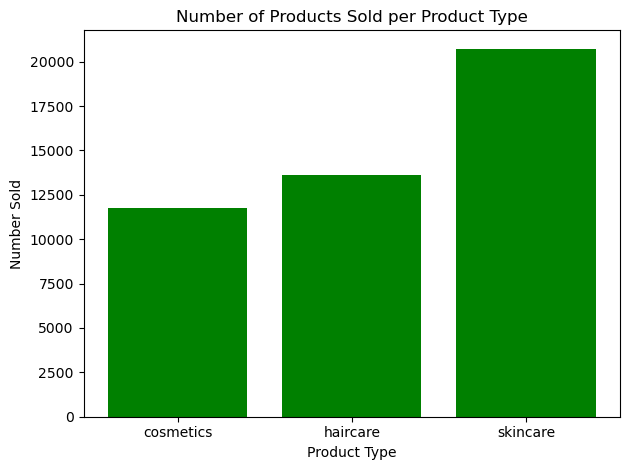

In [36]:
#Problem 1: Bar Charts
product_sale = df.groupby("Product type")["Number of products sold"].sum()
plt.bar(product_sale.index, product_sale.values, color = "green")
plt.title("Number of Products Sold per Product Type")
plt.xlabel("Product Type")
plt.ylabel("Number Sold")
plt.tight_layout()
plt.show()

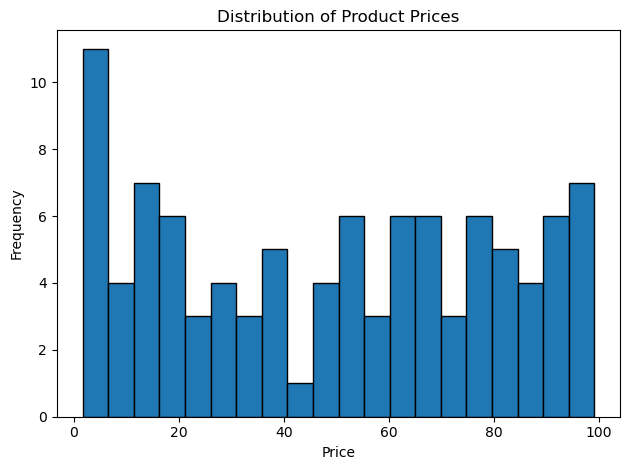

In [40]:
#Problem 2: Histograms
df["Price"].plot(kind='hist', bins=20, edgecolor='black')
plt.title("Distribution of Product Prices")
plt.xlabel("Price")
plt.tight_layout()
plt.show()

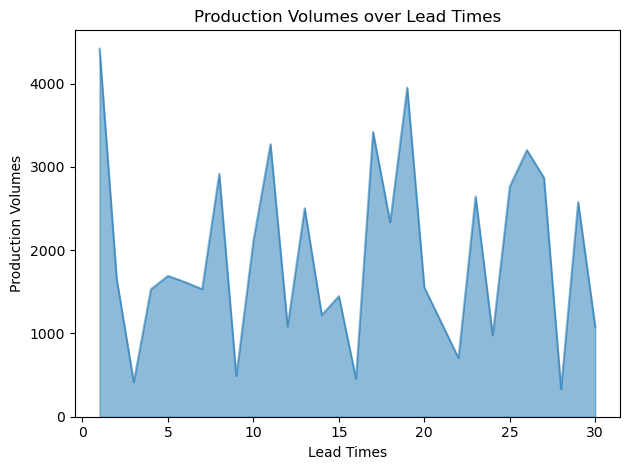

In [134]:
#Problem 3: Area Plots
df.groupby("Lead times")["Production volumes"].sum().sort_index().plot(kind='area', alpha=0.5)
plt.title("Production Volumes over Lead Times")
plt.xlabel("Lead Times")
plt.ylabel("Production Volumes")
plt.tight_layout()
plt.show()

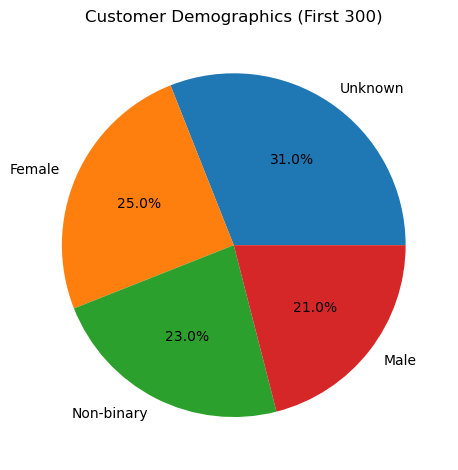

In [42]:
#Problem 4: Pie Charts
df.head(300)["Customer demographics"].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Customer Demographics (First 300)")
plt.ylabel("")
plt.tight_layout()
plt.show()

C:\Users\neilv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


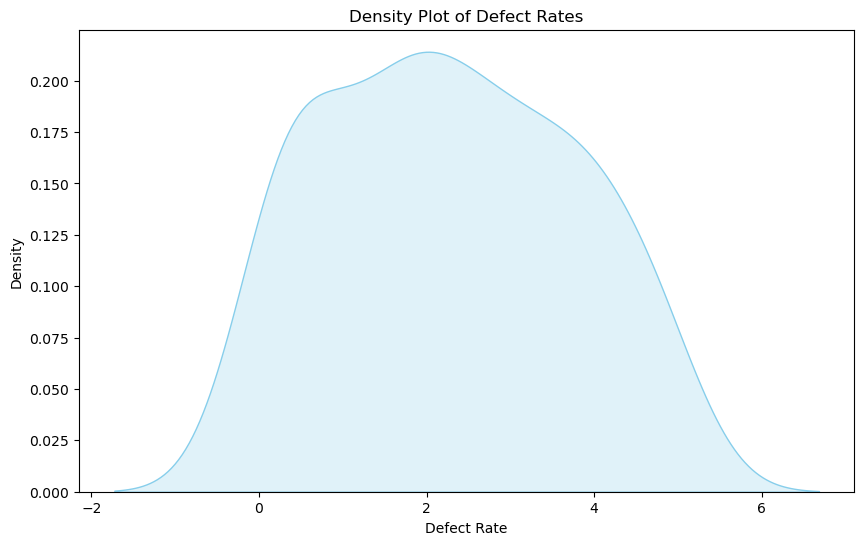

In [50]:
#Problem 5: Density Plots
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.kdeplot(df["Defect rates"], fill=True, color="skyblue")
plt.xlabel("Defect Rate")
plt.ylabel("Density")
plt.title("Density Plot of Defect Rates")
plt.show()

<Figure size 1000x1000 with 0 Axes>

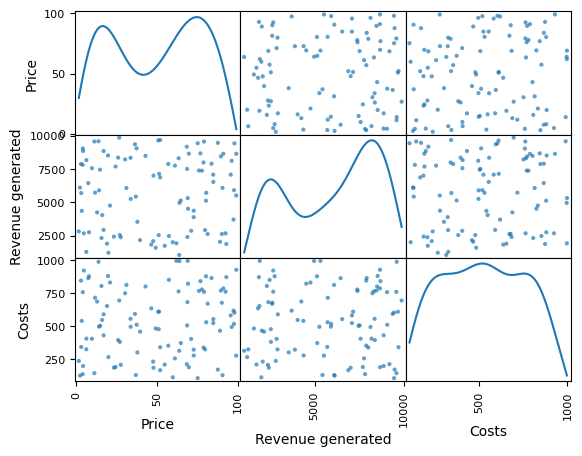

In [52]:
#Problem 6: Scatter Matrices
from pandas.plotting import scatter_matrix
plt.figure(figsize=(10, 10))
scatter_matrix(df[["Price", "Revenue generated", "Costs"]], diagonal='kde', alpha=0.7)
plt.show()

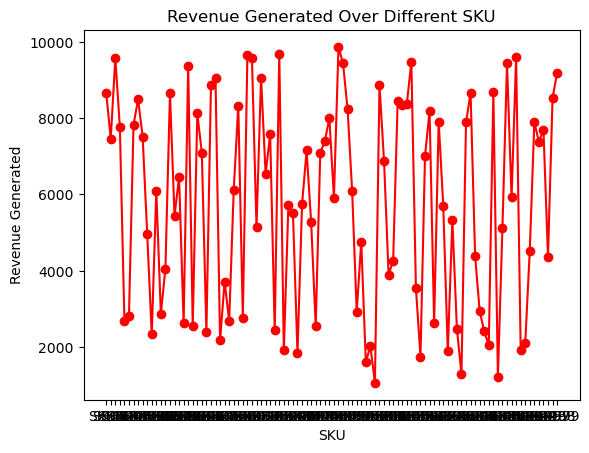

In [58]:
#Problem 7: Basic Plot with Pandas and Matplotlib
plt.plot(df["SKU"], df["Revenue generated"], marker='o', color='r')
plt.xlabel("SKU")
plt.ylabel("Revenue Generated")
plt.title("Revenue Generated Over Different SKU")
plt.show()

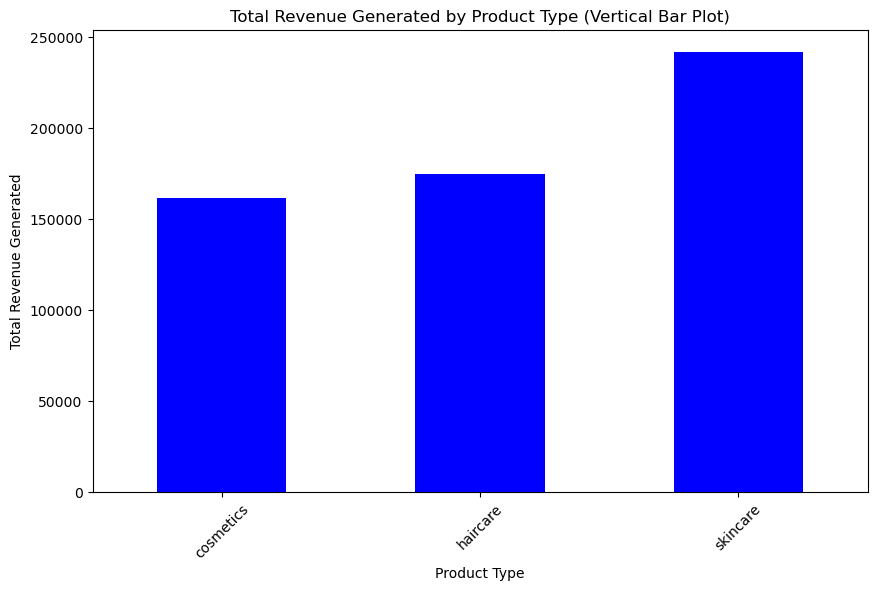

In [68]:
#Problem 8: Specifying Different Plot Types (Vertical Bar)
plt.figure(figsize=(10, 6))
df.groupby("Product type")["Revenue generated"].sum().plot(kind='bar', color='blue')
plt.xlabel("Product Type")
plt.ylabel("Total Revenue Generated")
plt.title("Total Revenue Generated by Product Type (Vertical Bar Plot)")
plt.xticks(rotation=45)
plt.show()

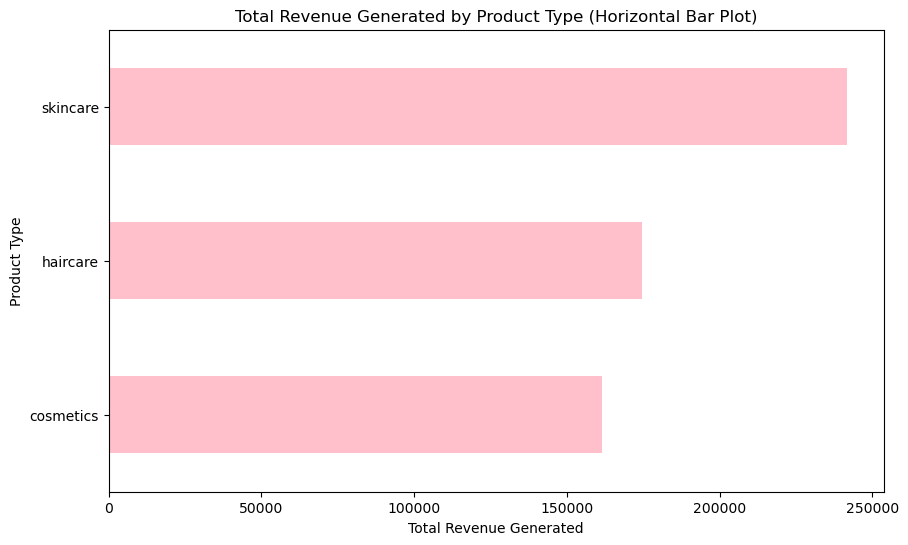

In [70]:
#Problem 8: Continued (Horizontal bar)
plt.figure(figsize=(10, 6))
df.groupby("Product type")["Revenue generated"].sum().plot(kind='barh', color='pink')
plt.xlabel("Total Revenue Generated")
plt.ylabel("Product Type")
plt.title("Total Revenue Generated by Product Type (Horizontal Bar Plot)")
plt.show()

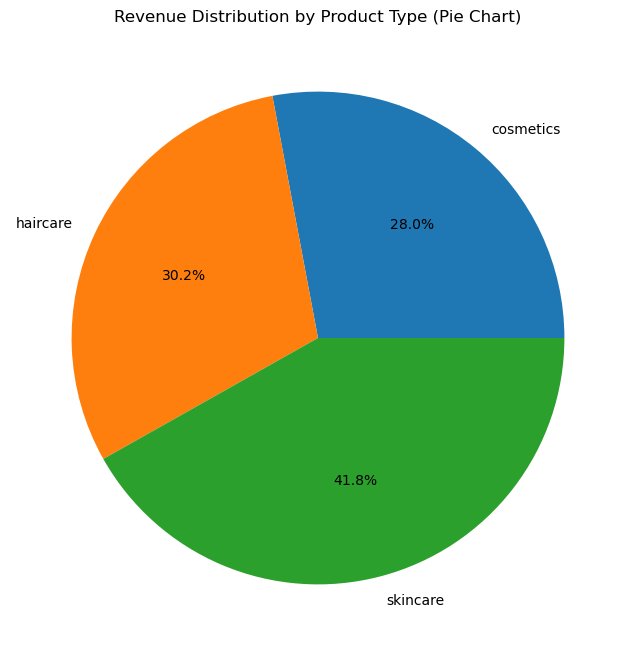

In [72]:
#Problem 8: Continued (pie)
plt.figure(figsize=(8, 8))
df.groupby("Product type")["Revenue generated"].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title("Revenue Distribution by Product Type (Pie Chart)")
plt.ylabel("")
plt.show()

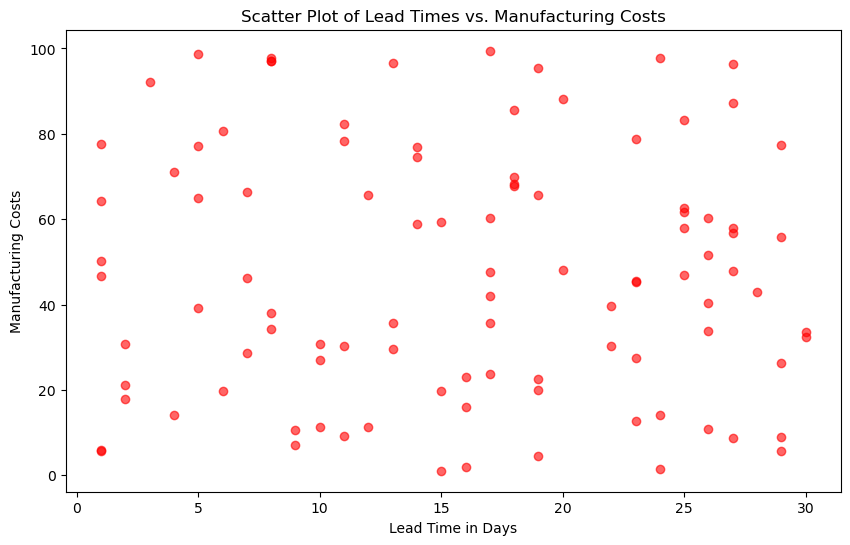

In [76]:
#Problem 9: Customizing Plots
plt.figure(figsize=(10, 6))
plt.scatter(df["Lead times"], df["Manufacturing costs"], color='red', alpha=0.6)
plt.xlabel("Lead Time in Days")
plt.ylabel("Manufacturing Costs")
plt.title("Scatter Plot of Lead Times vs. Manufacturing Costs")
plt.show()

<Figure size 1000x600 with 0 Axes>

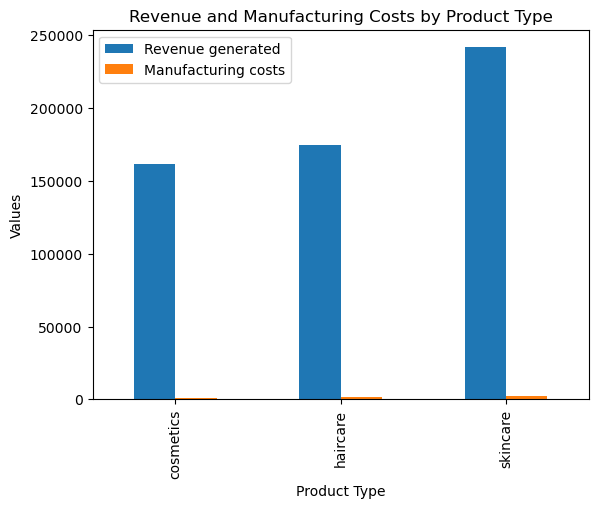

In [78]:
#Problem 10: Plotting Specific Columns
plt.figure(figsize=(10, 6))
df.groupby("Product type")[["Revenue generated", "Manufacturing costs"]].sum().plot(kind='bar')
plt.xlabel("Product Type")
plt.ylabel("Values")
plt.title("Revenue and Manufacturing Costs by Product Type")
plt.show()

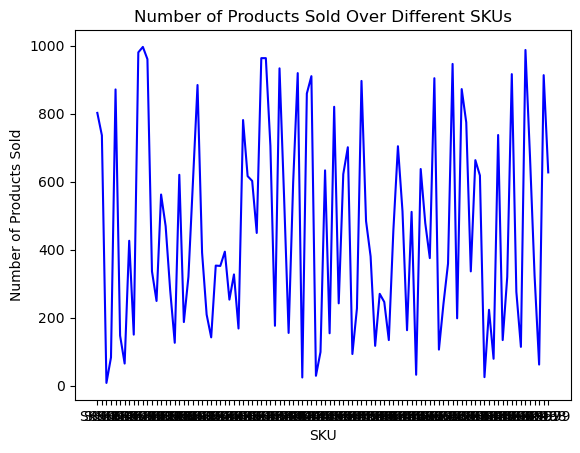

In [82]:
#Problem 11: Simple Line Plot
plt.plot(df["SKU"], df["Number of products sold"], color='b')
plt.xlabel("SKU")
plt.ylabel("Number of Products Sold")
plt.title("Number of Products Sold Over Different SKUs")
plt.show()

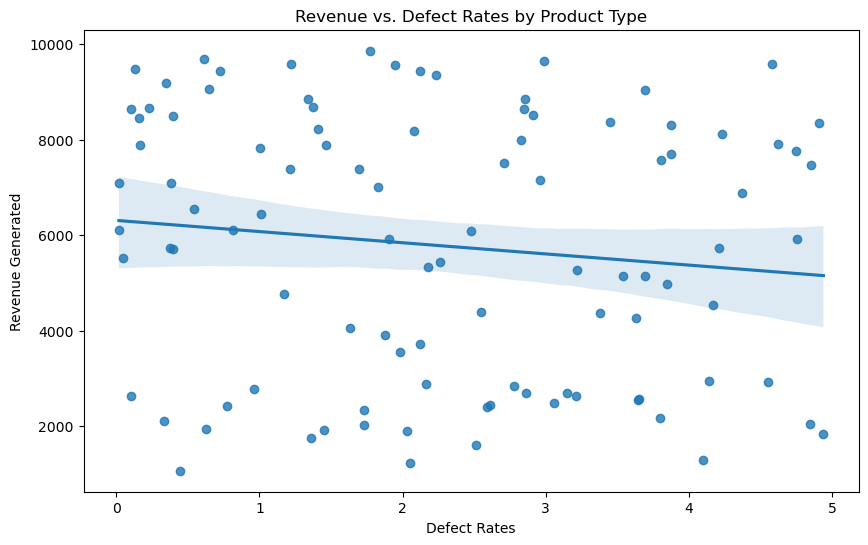

In [88]:
#Problem 12: Analyzing Revenue and Defect Rates
plt.figure(figsize=(10, 6))
sns.regplot(x=df["Defect rates"], y=df["Revenue generated"])
plt.xlabel("Defect Rates")
plt.ylabel("Revenue Generated")
plt.title("Revenue vs. Defect Rates by Product Type")
plt.show()

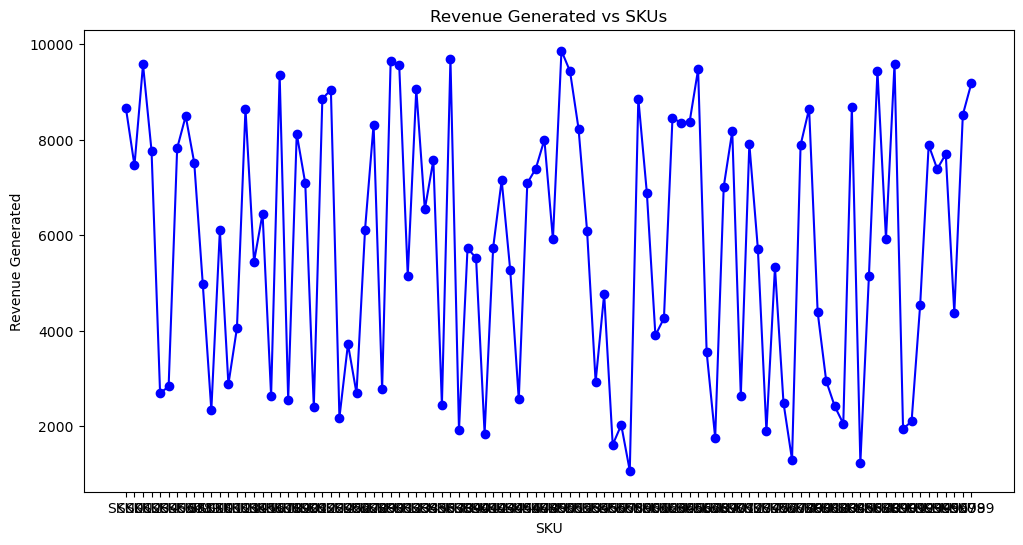

In [96]:
#Problem 13: Adding Axis Labels
plt.figure(figsize=(12, 6))
plt.plot(df["SKU"], df["Revenue generated"], marker='o', linestyle='-', color='blue')
plt.xlabel("SKU")
plt.ylabel("Revenue Generated")
plt.title("Revenue Generated vs SKUs")
plt.show()

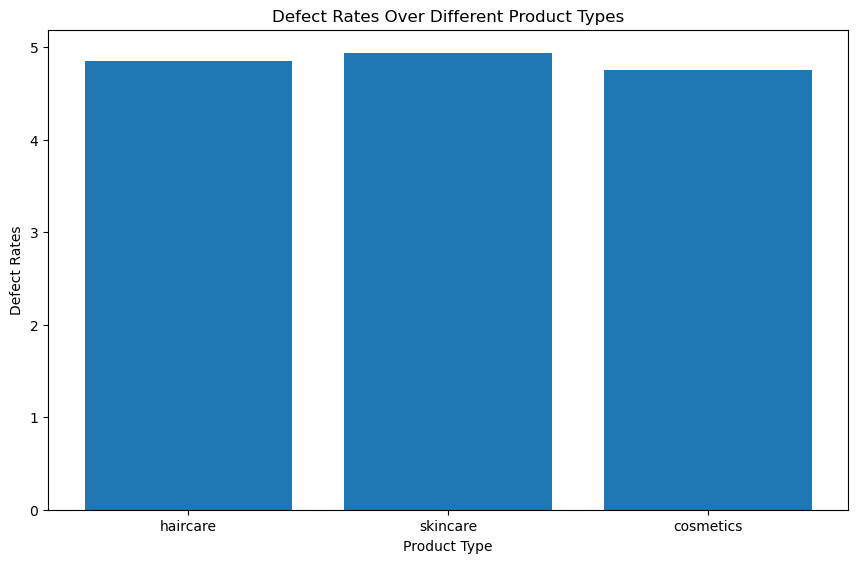

In [136]:
#Problem 14: Creating a Plot using add_axes()
fig = plt.figure(figsize=(10, 6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.bar(df["Product type"], df["Defect rates"])
ax.set_xlabel("Product Type")
ax.set_ylabel("Defect Rates")
ax.set_title("Defect Rates Over Different Product Types")
plt.show()

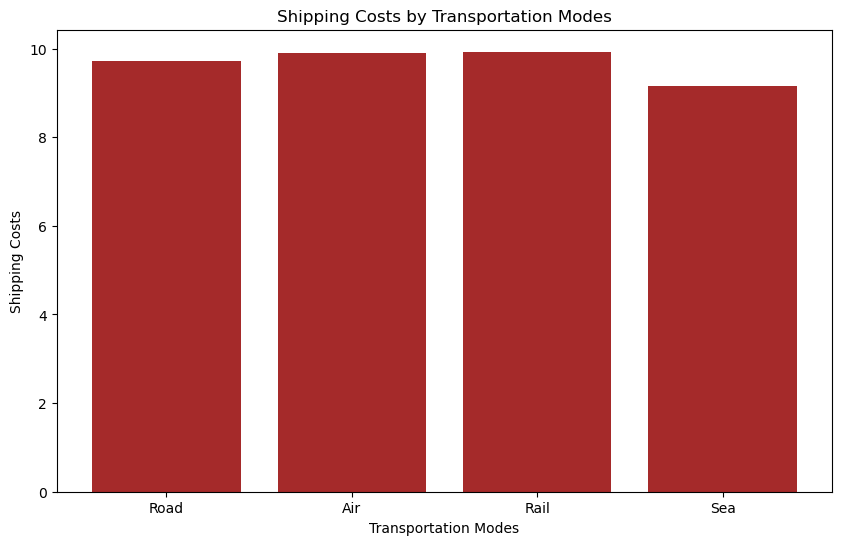

In [106]:
#Problem 15: Creating a Plot using add_subplot()
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)
ax1.bar(df["Transportation modes"], df["Shipping costs"], color='brown')
ax1.set_xlabel("Transportation Modes")
ax1.set_ylabel("Shipping Costs")
ax1.set_title("Shipping Costs by Transportation Modes")
plt.show()

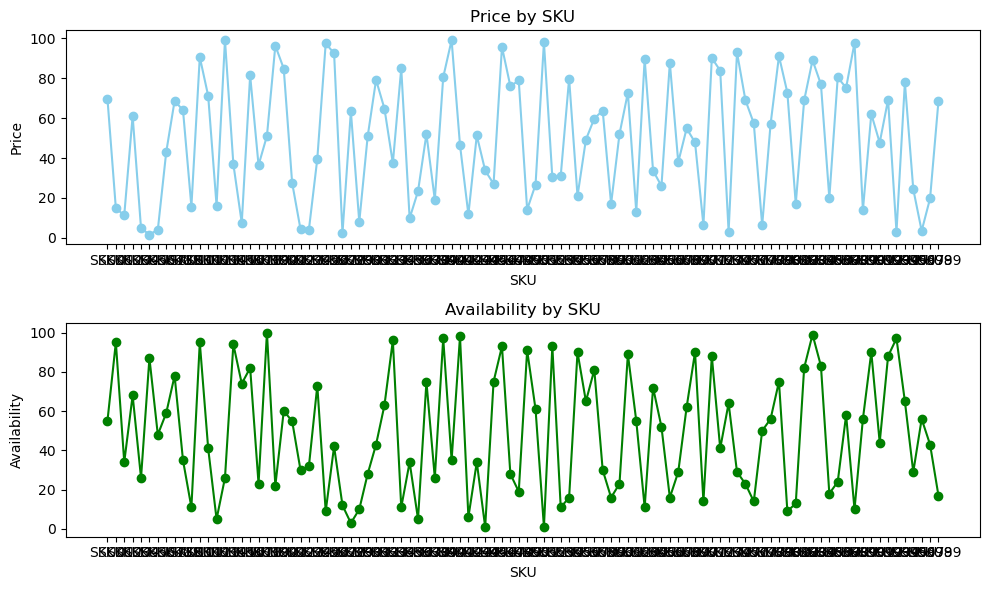

In [114]:
#Problem 16: Creating Two Plots using add_subplot()
fig = plt.figure(figsize=(10, 6))

ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(df["SKU"], df["Price"], marker = "o", color = "skyblue")
ax1.set_title("Price by SKU")
ax1.set_xlabel("SKU")
ax1.set_ylabel("Price")

ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(df["SKU"], df["Availability"], marker = "o", color = "green")
ax2.set_title("Availability by SKU")
ax2.set_xlabel("SKU")
ax2.set_ylabel("Availability")

plt.tight_layout()
plt.show()

plt.show()

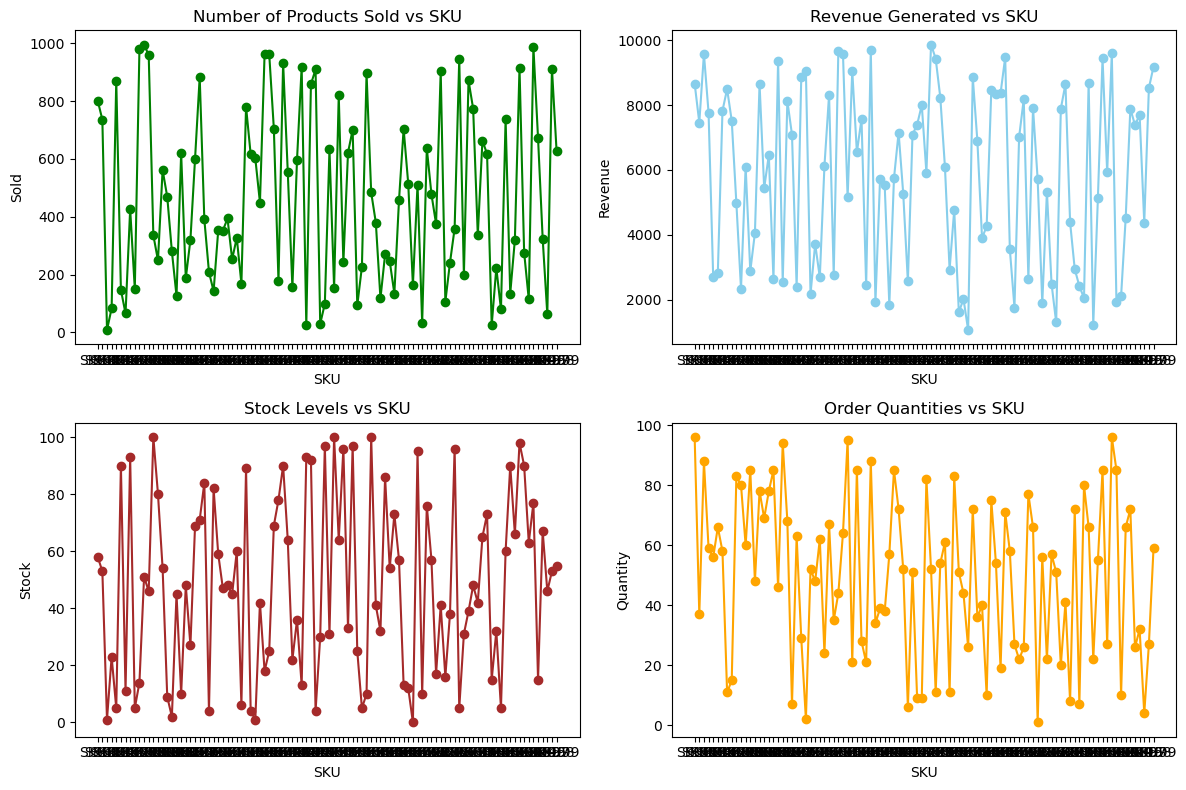

In [120]:
#Problem 17: Creating Four Plots using add_subplot()
fig = plt.figure(figsize=(12, 8))

ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(df["SKU"], df["Number of products sold"], marker = "o", color = "green")
ax1.set_title("Number of Products Sold vs SKU")
ax1.set_xlabel("SKU")
ax1.set_ylabel("Sold")

ax2 = fig.add_subplot(2, 2, 2)
ax2.plot(df["SKU"], df["Revenue generated"], marker = "o", color = "skyblue")
ax2.set_title("Revenue Generated vs SKU")
ax2.set_xlabel("SKU")
ax2.set_ylabel("Revenue")

ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(df["SKU"], df["Stock levels"], marker = "o", color = "brown")
ax3.set_title("Stock Levels vs SKU")
ax3.set_xlabel("SKU")
ax3.set_ylabel("Stock")

ax4 = fig.add_subplot(2, 2, 4)
ax4.plot(df["SKU"], df["Order quantities"], marker = "o", color = "orange")
ax4.set_title("Order Quantities vs SKU")
ax4.set_xlabel("SKU")
ax4.set_ylabel("Quantity")

plt.tight_layout()
plt.show()


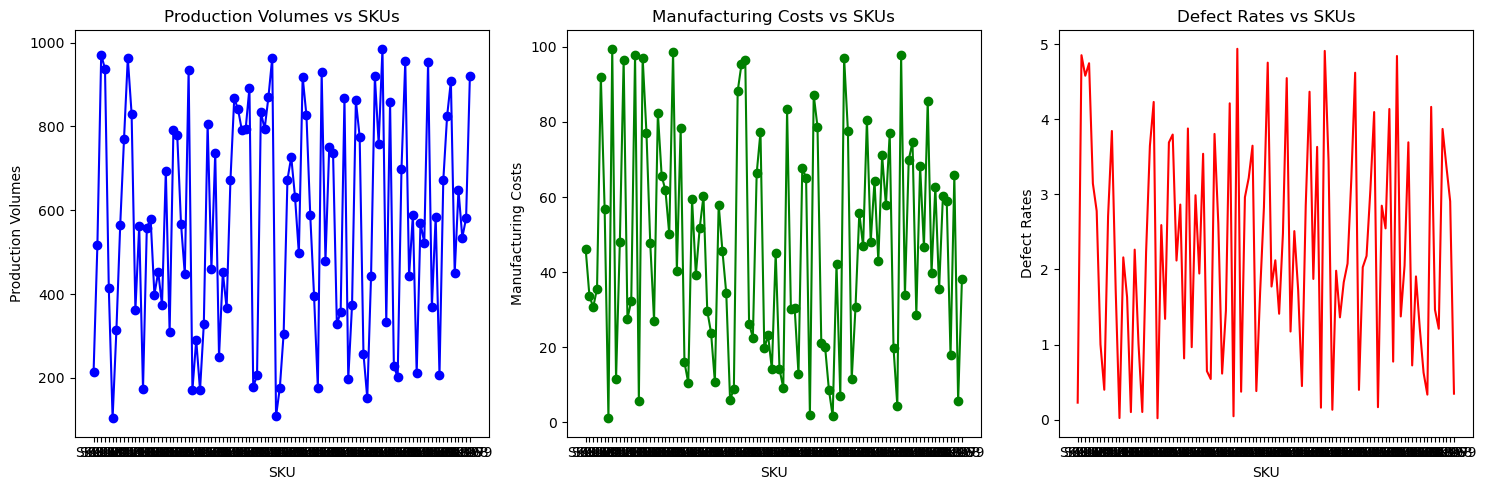

In [124]:
#Problem 18: Setting the figsize Argument
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].plot(df["SKU"], df["Production volumes"], marker='o', color='blue')
ax[0].set_xlabel("SKU")
ax[0].set_ylabel("Production Volumes")
ax[0].set_title("Production Volumes vs SKUs")
ax[0].tick_params(axis='x')

ax[1].plot(df["SKU"], df["Manufacturing costs"], marker='o', color='green')
ax[1].set_xlabel("SKU")
ax[1].set_ylabel("Manufacturing Costs")
ax[1].set_title("Manufacturing Costs vs SKUs")
ax[1].tick_params(axis='x')

ax[2].plot(df["SKU"], df["Defect rates"], color='red')
ax[2].set_xlabel("SKU")
ax[2].set_ylabel("Defect Rates")
ax[2].set_title("Defect Rates vs SKUs")
ax[2].tick_params(axis='x')
plt.tight_layout()
plt.show()

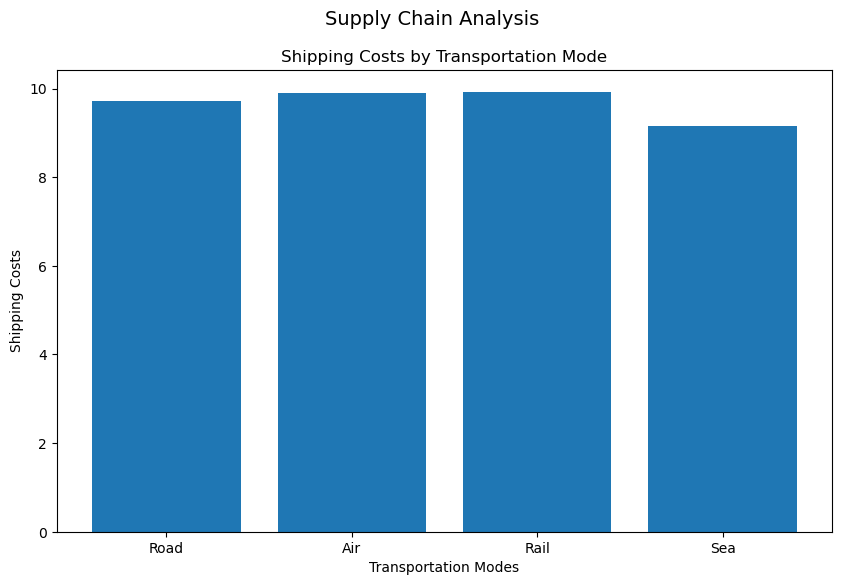

In [128]:
#Problem 19: Creating the Title
fig = plt.figure(figsize=(10, 6))
fig.suptitle("Supply Chain Analysis", fontsize=14)
ax1 = fig.add_subplot(111)
ax1.bar(df["Transportation modes"], df["Shipping costs"])
ax1.set_xlabel("Transportation Modes")
ax1.set_ylabel("Shipping Costs")
ax1.set_title("Shipping Costs by Transportation Mode")
plt.show()

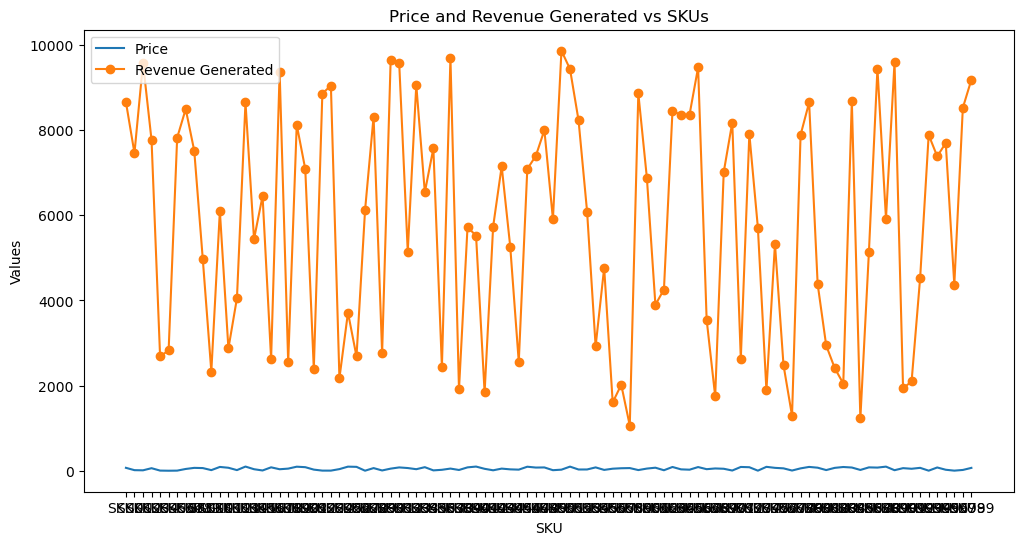

In [132]:
#Problem 20: Adding the Legend
plt.figure(figsize=(12, 6))
plt.plot(df["SKU"], df["Price"], label='Price')
plt.plot(df["SKU"], df["Revenue generated"], marker='o', label='Revenue Generated')
plt.xlabel("SKU")
plt.ylabel("Values")
plt.title("Price and Revenue Generated vs SKUs")
plt.legend()
plt.show()